# BT4012 Project: Exploratory Data Analysis
### Completed by: Group 8

In [61]:
# import necessary packages
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Train dataset

In [62]:
pd.set_option('display.max_columns', None)
# loading dataframe
df = pd.read_csv('../data/raw/fraudTrain.csv')

# drop the index column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [63]:
df.shape

(1296675, 22)

In [64]:
#trans_num can be the unique identifier for each row
df['trans_num'].nunique()

1296675

## Features
Training set for Credit Card Transactions

trans_date_trans_time - Transaction DateTime<br>
cc_num - Credit Card Number of Customer<br>
merchant - Merchant Name<br>
category - Category of Merchant<br>
amt - Amount of Transaction<br>
first - First Name of Credit Card Holder<br>
last - Last Name of Credit Card Holder<br>
gender - Gender of Credit Card Holder<br>
street - Street Address of Credit Card Holder<br>
city - City of Credit Card Holder<br>
state - State of Credit Card Holder<br>
zip - Zip of Credit Card Holder<br>
lat - Latitude Location of Credit Card Holder<br>
long - Longitude Location of Credit Card Holder<br>
city_pop - Credit Card Holder's City Population<br>
job - Job of Credit Card Holder<br>
dob - Date of Birth of Credit Card Holder<br>
trans_num - Transaction Number<br>
unix_time - UNIX Time of transaction<br>
merch_lat - Latitude Location of Merchant<br>
merch_long - Longitude Location of Merchant<br>
is_fraud - Fraud Flag <--- Target Class


Continuous: trans_date_trans_time, amt, lat, long, unix_time, merch_lat, merch_long

Categorical: cc_num, merchant, category, first, last, gender, street, city, state, zip, city_pop, job, dob, trans_num

Label: is_fraud

In [65]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [66]:
# checking for null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [67]:
# checking for na values
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [68]:
df[df.duplicated()]
# no duplicate rows

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [69]:
fraud_count = df['is_fraud'].value_counts().reset_index().rename({'index':'Value','is_Fraud':'Count'}, axis=1)
print(fraud_count)

   Value  is_fraud
0      0   1289169
1      1      7506


In [70]:
# check distinct values for each feature
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [71]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
min_date = df['trans_date_trans_time'].min()
max_date = df['trans_date_trans_time'].max()

print(min_date)
print(max_date)

2019-01-01 00:00:18
2020-06-21 12:13:37


In [72]:
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']
unique_values_categorical = {col: df[col].unique() for col in categorical_columns}
unique_values_categorical

{'merchant': array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
        'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
        'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
        'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
        'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
        'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
        'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
        'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
        'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
        'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
        'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
        'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
        'fraud_Bruen-Yost', 'fraud_Kunze Inc',
        'fraud_Nitzsche, Kessler and Wolff',
        'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
        'fraud_Bali

### Notes
generally quite a clean dataset (no na values, no null values, no duplicate rows)

data spans from 1/1/2019 to 21/6/2020

data preprocessing/ fe efforts:
- drop useless columns like street and cc_num
- dob - fe new column age
- transaction date need convert to datetime
- can also fe new features like holiday indicator (boolean), seasonality (categorical) etc
- using lat/long features, can also expand dataset for geographical features (can use google places API)
- standard preprocessing stuff - normalisation for continuous var, encoding for categorical
- dataset is highly imbalanced - can do resampling (oversampling minority class/ undersampling majority class/ hybrid resampling)


### Plots

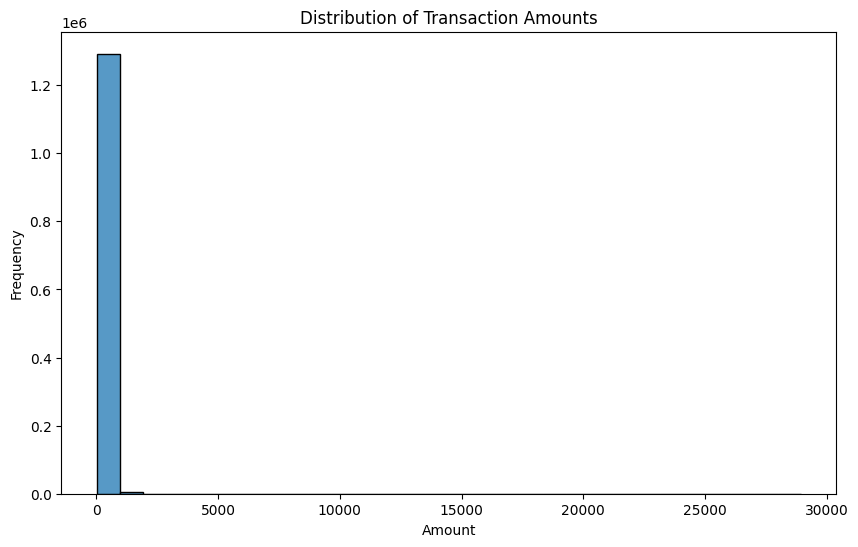

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [74]:
min_amt = df['amt'].min()
max_amt = df['amt'].max()
print(f"Minimum Amount: {min_amt}")
print(f"Maximum Amount: {max_amt}")

Minimum Amount: 1.0
Maximum Amount: 28948.9


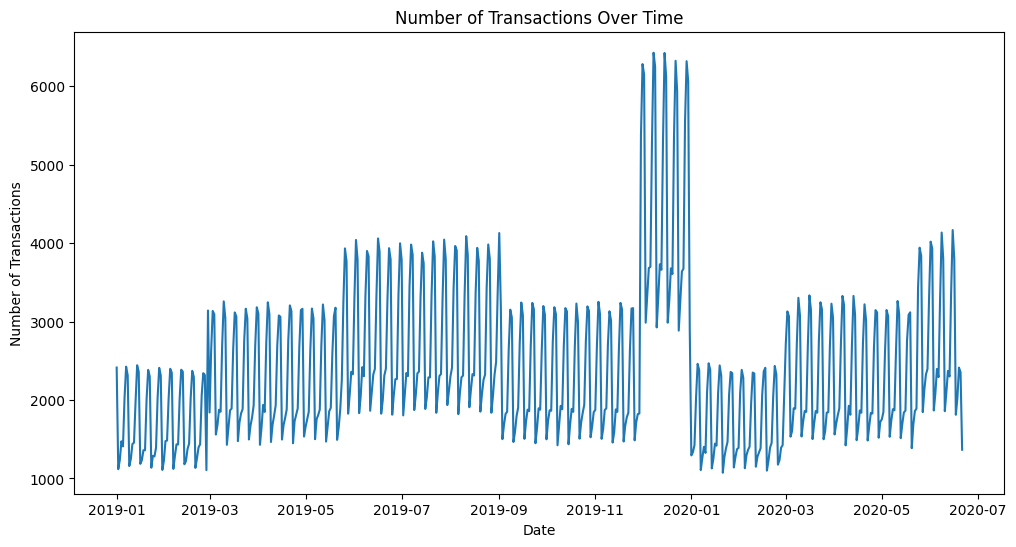

In [75]:
plt.figure(figsize=(12, 6))
df['trans_date_trans_time'].groupby(df['trans_date_trans_time'].dt.date).count().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


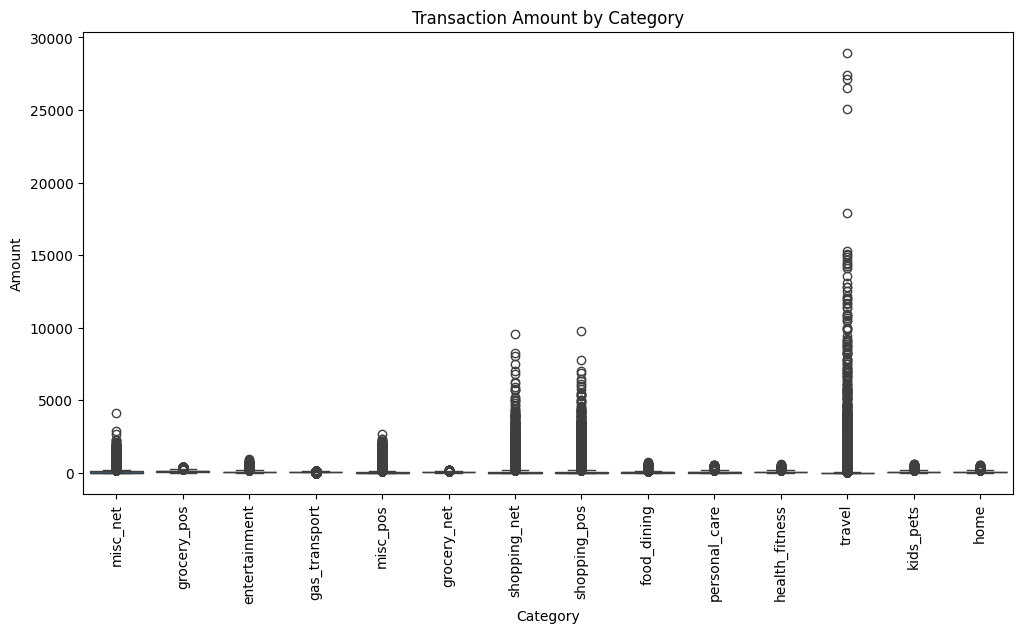

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=df)
plt.title('Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()


/var/folders/00/xswft9sn6ds7rv7bz_5n8ylw0000gn/T/ipykernel_1560/415100949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette="Set2")


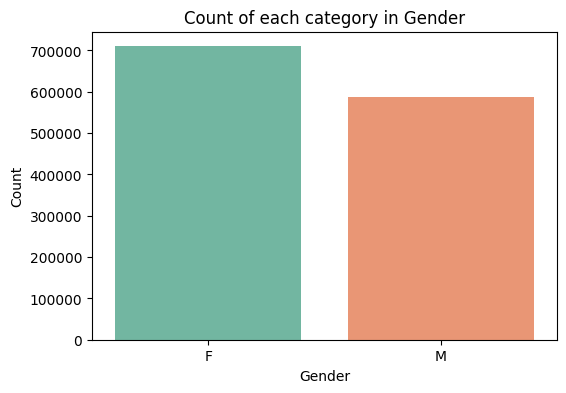

In [77]:
# Plot the count of each category in the 'gender' feature
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette="Set2")
plt.title('Count of each category in Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

/var/folders/00/xswft9sn6ds7rv7bz_5n8ylw0000gn/T/ipykernel_1560/3141365322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='state', palette="Set2")


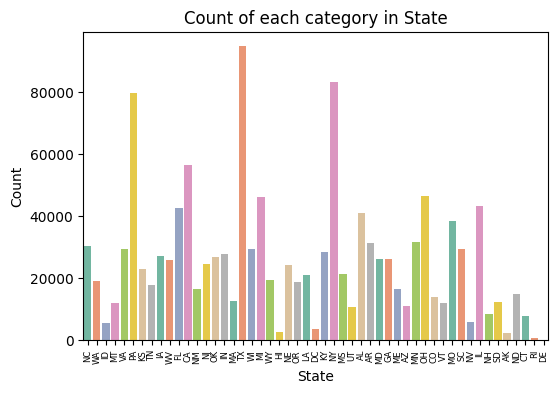

In [78]:
# Plot the count of each category in the 'state' feature
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='state', palette="Set2")
plt.title('Count of each category in State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=6)

plt.show()

In [79]:
# checking geographic coverage or dataset
min_lon, min_lat = df['long'].min(), df['lat'].min()
max_lon, max_lat = df['long'].max(), df['lat'].max()

print(f"Min Longitude: {min_lon}\n"
      f"Min Latitude: {min_lat}\n"
      f"Max Longitude: {max_lon}\n"
      f"Max Latitude: {max_lat}")

# covers US

Min Longitude: -165.6723
Min Latitude: 20.0271
Max Longitude: -67.9503
Max Latitude: 66.6933


### Correlation Analysis

/var/folders/00/xswft9sn6ds7rv7bz_5n8ylw0000gn/T/ipykernel_1560/3200014450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


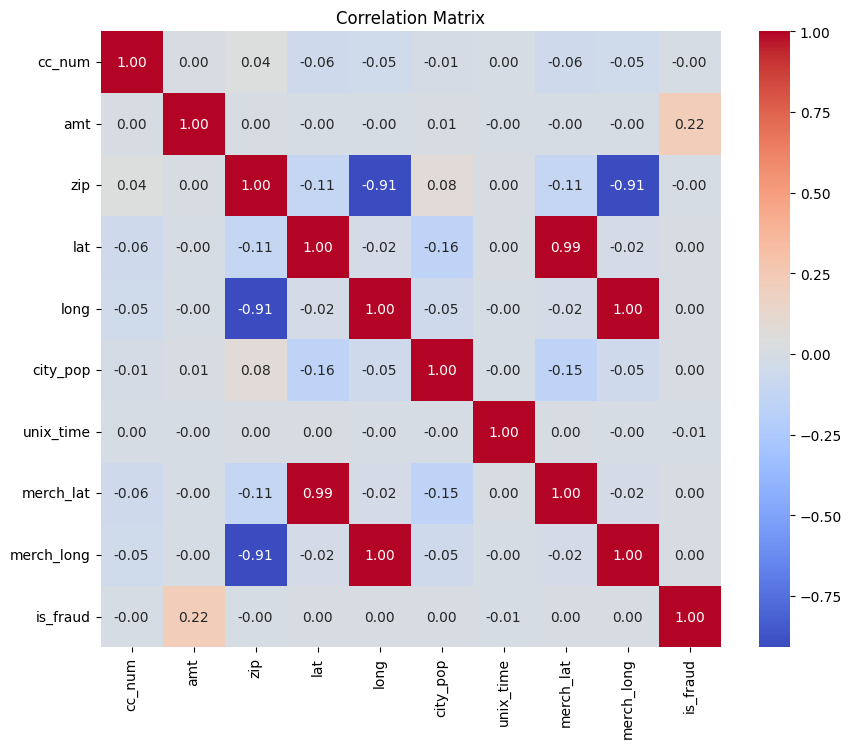

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Test dataset

In [81]:
pd.set_option('display.max_columns', None)
# loading dataframe
test_df = pd.read_csv('../data/raw/fraudTest.csv')

# drop the index column
test_df = test_df.drop(columns=['Unnamed: 0'])
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [82]:
test_df.shape

(555719, 22)

In [83]:
test_df['trans_num'].nunique()

555719

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [85]:
# checking for null values
test_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [86]:
# checking for na values
test_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [87]:
test_df[test_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [88]:
test_fraud_count = test_df['is_fraud'].value_counts().reset_index().rename({'index':'Value','is_Fraud':'Count'}, axis=1)
print(test_fraud_count)

   Value  is_fraud
0      0    553574
1      1      2145


In [89]:
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_min_date = test_df['trans_date_trans_time'].min()
test_max_date = test_df['trans_date_trans_time'].max()

print(test_min_date)
print(test_max_date)

2020-06-21 12:14:25
2020-12-31 23:59:34


In [90]:
# check distinct values for each feature
test_df.nunique()

trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

### Plots

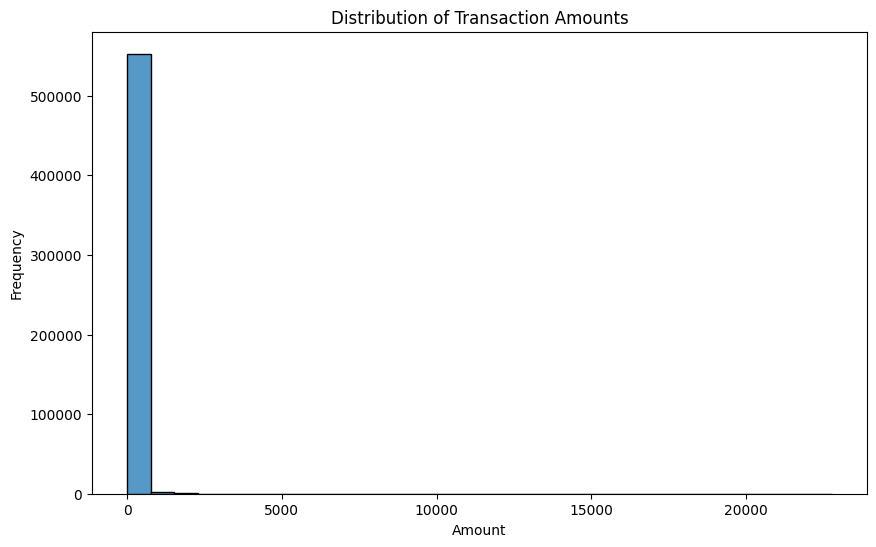

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(test_df['amt'], bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [92]:
min_amt = test_df['amt'].min()
max_amt = test_df['amt'].max()
print(f"Minimum Amount: {min_amt}")
print(f"Maximum Amount: {max_amt}")

Minimum Amount: 1.0
Maximum Amount: 22768.11


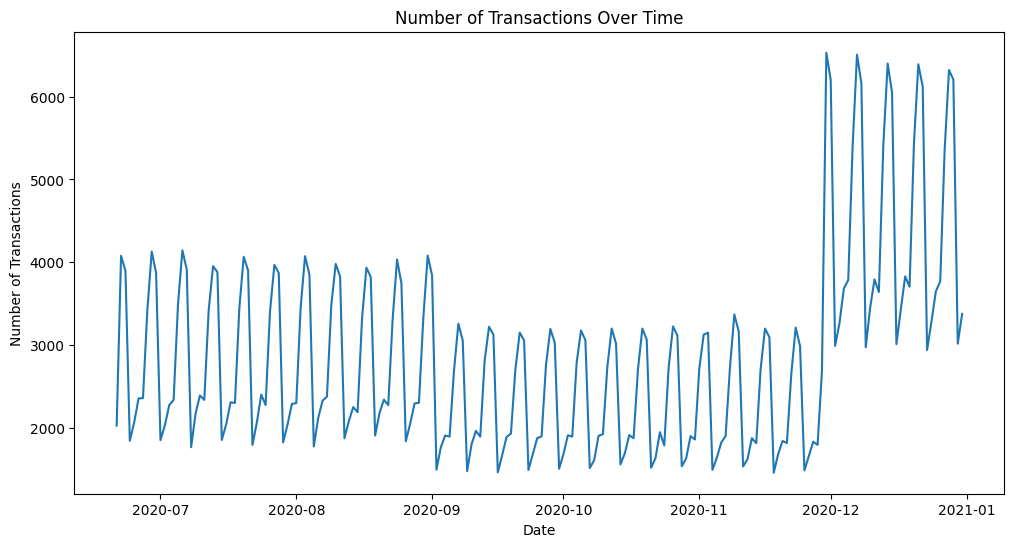

In [93]:
plt.figure(figsize=(12, 6))
test_df['trans_date_trans_time'].groupby(test_df['trans_date_trans_time'].dt.date).count().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

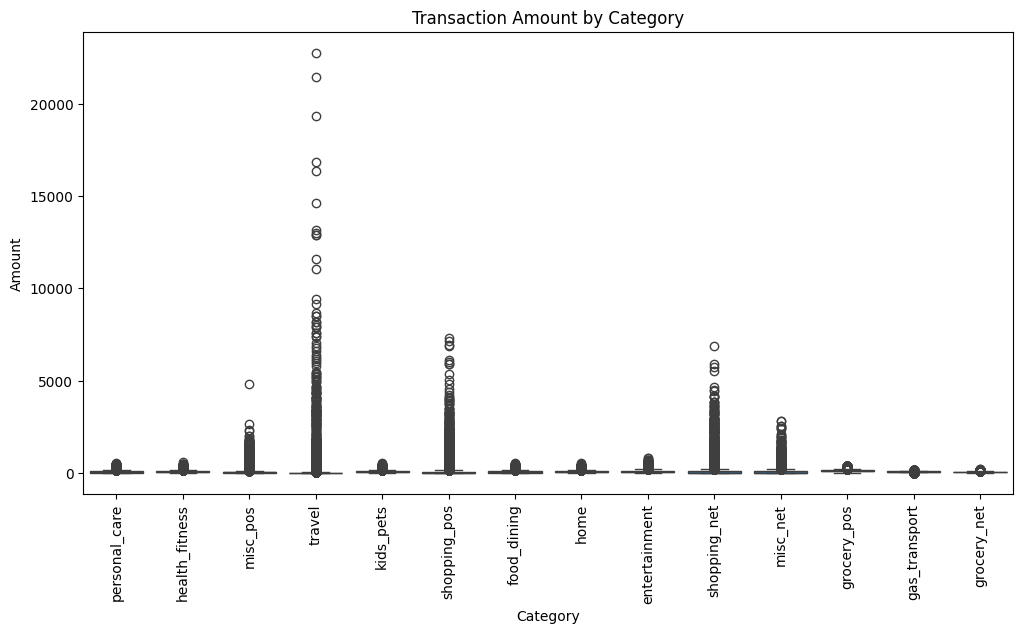

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=test_df)
plt.title('Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

### Notes
test dataset also quite clean (no na values, no null values, no duplicate rows)

test data spans from 21/6/2020 to 31/12/20200 - chronological, time-based train test split

num of train data samples: 1296675

num of test data samples: 555719

raw dataset train-test split ratio - 70% train, 30% test